# linear regression(线性回归)

* 注意：python版本为3.8

## 参考

* 视频：[地址](https://study.163.com/course/courseLearn.htm?courseId=1004570029#/learn/video?lessonId=1049052745&courseId=1004570029)

## 导入模块

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

sns.set(context='notebook', style='whitegrid', palette='dark')
%matplotlib inline

## 导入数据

In [2]:
root_path = './机器学习之吴恩达作业1/'

In [3]:
ex1data1_path = root_path + 'ex1data1.txt'

In [4]:
df = pd.read_csv(ex1data1_path, names=['population', 'profit'])

## 数据eda

In [5]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


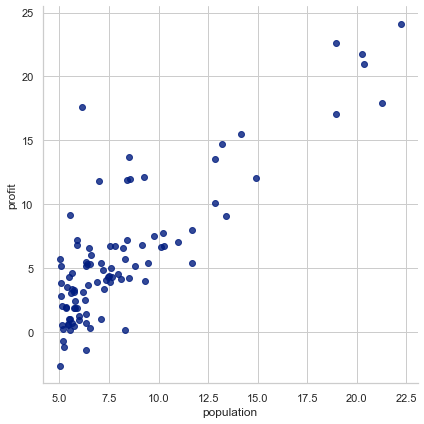

In [8]:
# Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=False)
plt.show()

## 一些函数

1. 读取X,y函数`func_get_X_y()`
2. 读取y函数`func_get_y()`
3. 归一化函数`func_normalize_X()`

In [9]:
def func_get_X_y(df):
    """
    得到X,y
    :param df: A dataframe
    :return X: ndarray matrix
    :return y: target
    """
    X = df.iloc[:, :-1].values
    y = np.array(df.iloc[:, -1])
    return X.T, np.expand_dims(y, axis=0)

In [10]:
def func_normalize_X(X):
    """
    normalize X
    :param X: ndarray matrix
    :return X_norm: norm ndarray matrix
    """
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_std = np.std(X, axis=1, keepdims=True)
    X_norm = (X - X_mean) / X_std
    return X_norm

In [11]:
X, y = func_get_X_y(df)

In [12]:
X.shape

(1, 97)

In [13]:
y.shape

(1, 97)

In [14]:
np.mean(X, axis=1, keepdims=True)

array([[8.1598]])

In [15]:
np.std(X, axis=1, keepdims=True)

array([[3.849884]])

In [16]:
X_norm = func_normalize_X(X)

In [17]:
X_norm = func_normalize_X(X)

In [18]:
np.mean(X_norm, axis=1, keepdims=True)

array([[3.1933219e-16]])

In [19]:
np.std(X_norm, axis=1, keepdims=True)

array([[1.]])

## DNN实现linear regression

### 步骤

1. 初始化参数
2. forward step
3. 计算损失
4. backward step
5. 更新参数
6. 将1-5步集合到一起
7. predict

### 初始化参数

In [ ]:
def func_initial_parameters(X):
    """
    初始化参数
    :param X: input vector
    :return params
    """
    n_x = X.shape[0]
    
    w = np.zeros((n_x, 1))
    b = np.zeros((1, 1))
    
    params = {
        'w': w,
        'b': b
    }
    return params

In [ ]:
parameters = func_initial_parameters(X_norm)

In [ ]:
for key, value in parameters.items():
    print(key, value)
    print(value.shape)

### forward step

$$
z = w*x+b
$$

In [ ]:
def func_forward_propagation(parameters, X):
    """
    forward step
    :param parameters:
    :param X: input vector
    :return z: output vector
    """
    w = parameters['w']
    b = parameters['b']
    z = np.dot(w.T, X) + b
    return z

In [ ]:
z = func_forward_propagation(parameters, X_norm)

In [ ]:
z.shape

### compute cost

* cost公式

    $$
    cost = \frac{1}{2m}(z-y)^2
    $$

In [ ]:
def func_compute_cost(z, y):
    """
    计算损失
    :param z: output vector
    :param y: true label
    :return cost: cost
    """
    m = y.shape[1]
    
    cost = 1 / (2 * m) * np.sum(np.power(z-y, 2))
    cost = cost.squeeze()
    return cost

In [ ]:
cost = func_compute_cost(z, y)

In [ ]:
cost

### backward step

* 梯度公式

    $$
    dw = 1/m * X^T(z-y)  \\
    db = 1/m * (z-y)
    $$

In [ ]:
def func_backward_propagation(parameters, z, X, y):
    """
    计算梯度
    :param parameters:
    :param X:
    :param y:
    :param z:
    :return grads:
    """
    
    m = X.shape[1]
    
    dw = 1 / m * np.dot(X, (z-y).T)
    db = 1 / m * np.sum(z - y, axis=1, keepdims=True)
    
    grads = {
        'dw': dw,
        'db': db
    }
    return grads

In [ ]:
grads = func_backward_propagation(parameters, z, X, y)

### 更新参数

In [ ]:
grads

### 更新参数

* 公式

    $$
    \theta = \theta - \alpha * d\theta
    $$

In [32]:
def func_update_parameters(parameters, grads, lr):
    """
    更新参数
    :param parameters:
    :param grads:
    :param lr:
    :return parameters:
    """
    w = parameters['w']
    b = parameters['b']
    
    dw = grads['dw']
    db = grads['db']
    
    w = w - lr * dw
    b = b - lr * db
    
    parameters = {
        'w': w,
        'b': b
    }
    return parameters

In [33]:
parameters = func_update_parameters(parameters, grads, lr=0.01)

### 整合到模型

In [34]:
parameters

{'w': array([[0.6532885]]), 'b': array([[0.05839135]])}

## 单变量线性回归
### sklearn

In [35]:
def func_linear_model(X, y, num_epochs=10000, lr=0.01, print_cost=False):
    """
    神经网络实现linear model
    :param X:
    :param y:
    :param num_epochs:
    :param lr:
    :param print_cost:
    :return parameters
    """
    parameters = func_initial_parameters(X)
    cost_list = []
    for i in range(num_epochs):
        z = func_forward_propagation(parameters, X)
        cost = func_compute_cost(z, y)
        cost_list.append(cost)
        grads = func_backward_propagation(parameters, z, X, y)
        parameters = func_update_parameters(parameters, grads, lr)
        
        if i % 1000 == 0 and print_cost:
            print('cost after %i epoch: %f' % (i, cost))
    
    return parameters, cost_list

## 单变量线性回归

### sklearn

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
lr.fit(X.T, y.squeeze())

LinearRegression()

In [38]:
lr.coef_

array([1.19303364])

### 自定义DNN

In [39]:
lr.intercept_

-3.8957808783118484

In [40]:
parameters, cost_list = func_linear_model(X, y, print_cost=True)

cost after 0 epoch: 32.072734
cost after 1000 epoch: 4.515956
cost after 2000 epoch: 4.478028
cost after 3000 epoch: 4.477000
cost after 4000 epoch: 4.476972
cost after 5000 epoch: 4.476971
cost after 6000 epoch: 4.476971
cost after 7000 epoch: 4.476971
cost after 8000 epoch: 4.476971
cost after 9000 epoch: 4.476971


In [41]:
parameters

{'w': array([[1.19303364]]), 'b': array([[-3.89578082]])}

In [42]:
# cost_list

### 可视化

In [43]:
w = parameters['w'].squeeze()
b = parameters['b'].squeeze()

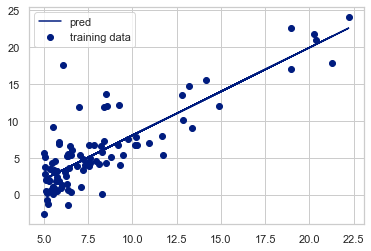

In [44]:
plt.scatter(X, y, label='training data')
plt.plot(X.squeeze(), (w*X+b).squeeze(), label='pred')
plt.legend(loc=2)
plt.show()

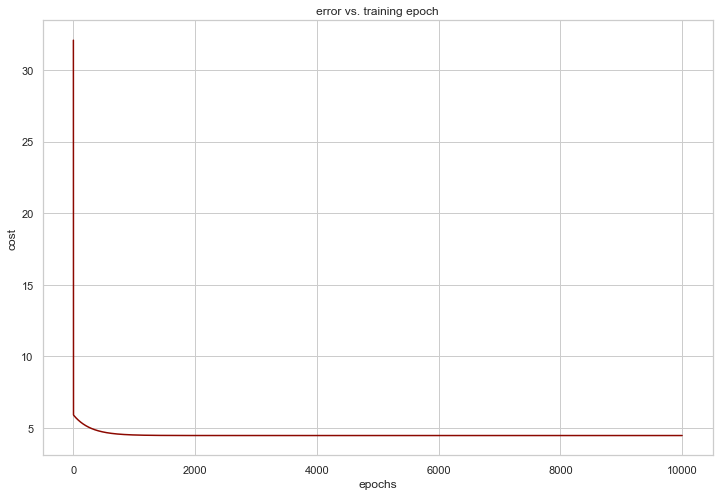

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(len(cost_list)), cost_list, 'r')
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
ax.set_title('error vs. training epoch')
plt.show()

## 多变量线性回归

In [46]:
ex1data2_path = root_path + 'ex1data2.txt'

In [47]:
df2 = pd.read_csv(ex1data2_path, header=None, names=['size', 'bedrooms', 'price'])

In [48]:
df2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [49]:
df2_norm = (df2 - df2.mean()) / df2.std()

In [50]:
df2_norm.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [51]:
X, y = func_get_X_y(df2_norm)

In [52]:
X.shape

(2, 47)

In [53]:
y.shape

(1, 47)

### sklearn

In [54]:
lr = LinearRegression()
lr.fit(X.T, y.squeeze())

LinearRegression()

In [55]:
lr.coef_

array([ 0.88476599, -0.05317882])

In [56]:
lr.intercept_

-1.1568575416727595e-16

### 自定义DNN

In [57]:
parameters, cost_list = func_linear_model(X, y, print_cost=True)

cost after 0 epoch: 0.489362
cost after 1000 epoch: 0.130703
cost after 2000 epoch: 0.130686
cost after 3000 epoch: 0.130686
cost after 4000 epoch: 0.130686
cost after 5000 epoch: 0.130686
cost after 6000 epoch: 0.130686
cost after 7000 epoch: 0.130686
cost after 8000 epoch: 0.130686
cost after 9000 epoch: 0.130686


In [58]:
parameters

{'w': array([[ 0.88476599],
        [-0.05317882]]),
 'b': array([[-1.11034113e-16]])}

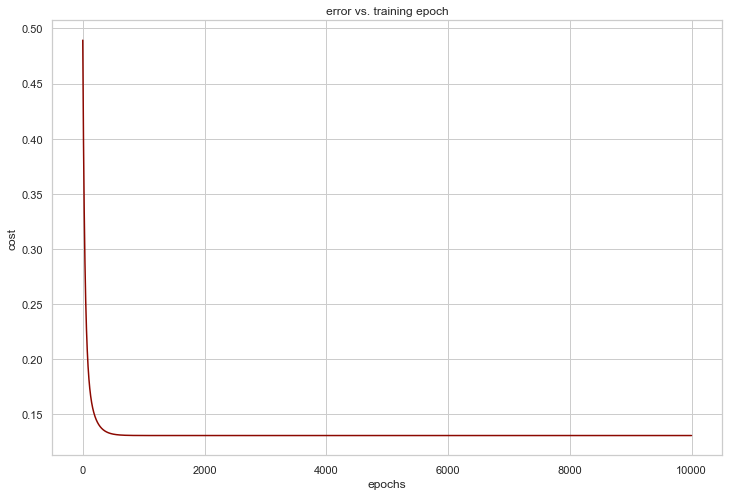

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(len(cost_list)), cost_list, 'r')
ax.set_xlabel('epochs')
ax.set_ylabel('cost')
ax.set_title('error vs. training epoch')
plt.show()

## TF2实现线性回归

### 参考

* [地址](https://huhuhang.com/post/machine-learning/tensorflow-2-0-02)

### 低阶API实现

In [60]:
X.shape

(2, 47)

In [61]:
y.shape

(1, 47)

In [62]:
import tensorflow as tf
tf.random.set_seed(2030)

In [63]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

2021-09-02 00:19:00.022482: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [64]:
X

<tf.Tensor: shape=(2, 47), dtype=float32, numpy=
array([[ 1.3000987e-01, -5.0418985e-01,  5.0247633e-01, -7.3572308e-01,
         1.2574760e+00, -1.9731728e-02, -5.8723980e-01, -7.2188139e-01,
        -7.8102303e-01, -6.3757312e-01, -7.6356702e-02, -8.5673720e-04,
        -1.3927335e-01,  3.1172919e+00, -9.2195630e-01,  3.7664309e-01,
        -8.5652304e-01, -9.6222293e-01,  7.6546788e-01,  1.2964844e+00,
        -2.9404828e-01, -1.4179000e-01, -4.9915650e-01, -4.8673380e-02,
         2.3773921e+00, -1.1333562e+00, -6.8287307e-01,  6.6102630e-01,
         2.5080982e-01,  8.0070120e-01, -2.0344831e-01, -1.2591895e+00,
         4.9476571e-02,  1.4298676e+00, -2.3868163e-01, -7.0929807e-01,
        -9.5844793e-01,  1.6524319e-01,  2.7863503e+00,  2.0299317e-01,
        -4.2365655e-01,  2.9862645e-01,  7.1261793e-01, -1.0075229e+00,
        -1.4454228e+00, -1.8708998e-01, -1.0037479e+00],
       [-2.2367519e-01, -2.2367519e-01, -2.2367519e-01, -1.5377669e+00,
         1.0904166e+00,  1.090

In [65]:
y

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[ 0.47574687, -0.08407444,  0.22862574, -0.86702454,  1.5953895 ,
        -0.32399786, -0.20403615, -1.1309483 , -1.0269735 , -0.7830513 ,
        -0.80305296,  0.05268191, -0.08328269,  2.874981  , -0.64389575,
         0.87561923, -0.32399786, -1.1237426 ,  1.2762754 ,  2.0680387 ,
        -0.69987786, -0.68308324, -0.77985233, -0.64389575,  1.8673027 ,
        -0.7238702 ,  0.99238193,  1.0283705 ,  1.0763551 , -0.32399786,
         0.07587451, -1.363666  , -0.20403615,  1.9152874 , -0.4359621 ,
        -0.7238702 , -0.88381916,  0.03668701,  1.6681663 , -0.4271649 ,
         0.22462702, -0.08407444, -0.21123385, -0.33119556, -1.2836915 ,
        -0.32399786, -0.8070437 ]], dtype=float32)>

#### 定义模型类

In [66]:
class Model(object):
    def __init__(self, n_x, n_y):
        tf.random.set_seed(2030)
        self.w = tf.Variable(tf.random.uniform(shape=(n_y, n_x)))
        self.b = tf.Variable(tf.random.uniform(shape=(n_y, 1)))
    
    def __call__(self, X):
#         z = np.dot(tf.transpose(self.w), X) + self.b
        z = tf.matmul(self.w, X) + self.b
        return z

In [67]:
n_x, n_y = X.shape[0], 1

In [68]:
model = Model(n_x, n_y)

In [69]:
z = model(X)

In [70]:
z

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[ 0.26395318,  0.22815093,  0.28497988, -0.08861065,  0.6312926 ,
         0.5591908 ,  0.22346255,  0.21586168,  0.21252298,  0.22062111,
         0.5559942 ,  0.25656542,  0.24875143,  1.0399749 ,  0.20456693,
         0.5815672 , -0.09543014,  0.20229377,  0.6035174 ,  0.6334947 ,
         0.24001399, -0.05508158,  0.22843508,  0.557557  ,  0.3908238 ,
         0.19263284,  0.2180638 ,  0.29393047,  0.27077267,  0.30181548,
        -0.05856234, -0.42185265,  0.56309783,  0.33733356,  0.54683053,
         0.21657205,  0.20250687,  0.5696331 ,  0.71760154,  0.57176423,
        -0.07099366,  0.27347204,  0.6005339 ,  0.19973646, -0.12867507,
         0.549743  ,  0.19994956]], dtype=float32)>

#### 损失函数

$$
mse = loss = \frac{1}{2m}(z-y)(z-y)^T
$$

In [71]:
def func_loss_linear_regression(model, X, y):
    """
    计算mse
    :param model: tf model
    :param X:
    :param y:
    :return loss
    """
#     n_x = X.shape[0]
#     n_y = y.shape[0]
    m = X.shape[1]
    z = model(X)
    loss = tf.reduce_mean(tf.square(z-y))  # Computes the mean of elements across dimensions of a tensor
#     loss = 1 / (2*m) * tf.matmul(z-y, tf.transpose(z-y))
    return loss

In [72]:
mse_loss = func_loss_linear_regression(model, X, y)

In [73]:
mse_loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.84892213>

#### update parameters

In [74]:
epochs = 10000
lr = 0.01

In [75]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:  # 追踪梯度
        loss = func_loss_linear_regression(model, X, y)
        dw, db = tape.gradient(loss, [model.w, model.b])
    model.w.assign_sub(lr*dw)
    model.b.assign_sub(lr*db)

    if epoch % 1000 == 0:
        print('epoch [{}/{}], loss {:.3f}'.format(epoch, epochs, loss))

epoch [0/10000], loss 0.849
epoch [1000/10000], loss 0.261
epoch [2000/10000], loss 0.261
epoch [3000/10000], loss 0.261
epoch [4000/10000], loss 0.261
epoch [5000/10000], loss 0.261
epoch [6000/10000], loss 0.261
epoch [7000/10000], loss 0.261
epoch [8000/10000], loss 0.261
epoch [9000/10000], loss 0.261


In [76]:
model.w

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 0.8847637 , -0.05317748]], dtype=float32)>

In [77]:
model.b

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-1.1218328e-08]], dtype=float32)>

In [78]:
y_hat = model(X)

In [79]:
y_hat

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[ 0.12692249, -0.4341944 ,  0.45646733, -0.56916654,  1.0545835 ,
        -0.07544354, -0.507674  , -0.6268    , -0.6791264 , -0.5522071 ,
        -0.12554325,  0.01113646, -0.11132954,  2.630201  , -0.803819  ,
         0.27525455, -0.6760459 , -0.8394455 ,  0.6192726 ,  1.0890968 ,
        -0.24826878, -0.0436761 , -0.42974108, -0.10105006,  2.1153247 ,
        -0.99085796, -0.5922868 ,  0.59674656,  0.23380189,  0.7203258 ,
        -0.09822914, -0.96243054, -0.01421054,  1.2769895 , -0.26916245,
        -0.61566675, -0.83610547,  0.08821556,  2.4072762 ,  0.12161537,
        -0.29306138,  0.27610835,  0.57251287, -0.8795253 , -1.197083  ,
        -0.22351605, -0.8761853 ]], dtype=float32)>

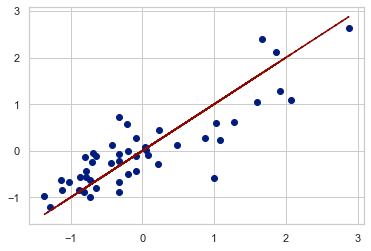

In [80]:
plt.scatter(y, y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

### 高阶API实现

* `tf.keras`模块下提供的全连接层实际上就是一个线性计算过程

In [81]:
X = tf.transpose(X)
y = tf.transpose(y)

In [82]:
X.shape

TensorShape([47, 2])

In [83]:
y.shape

TensorShape([47, 1])

#### 构建模型

In [84]:
model = tf.keras.layers.Dense(units=1)

In [85]:
y_hat = model(X)

In [86]:
y_hat.shape

TensorShape([47, 1])

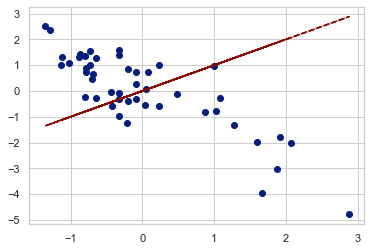

In [87]:
plt.scatter(y, y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

In [88]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.2987416 ],
        [-0.30637085]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [89]:
y.shape

TensorShape([47, 1])

In [90]:
y_hat.shape

TensorShape([47, 1])

In [91]:
tf.reshape(y_hat, (1, -1))

<tf.Tensor: shape=(1, 47), dtype=float32, numpy=
array([[-0.10032167,  0.7233399 , -0.58405936,  1.4266411 , -1.9672081 ,
        -0.30844542,  0.8312003 ,  1.0060649 ,  1.0828747 ,  0.8965703 ,
        -0.23490423,  0.06964023,  0.24940765, -4.7852283 ,  1.2659105 ,
        -0.8232339 ,  1.583529  ,  1.3182065 , -1.3282168 , -2.01787   ,
         0.4504203 ,  0.6552755 ,  0.7168029 , -0.2708577 , -3.0190904 ,
         1.5404644 ,  0.9554032 , -0.78997475, -0.2572096 , -0.9713764 ,
         0.73535377,  2.509088  , -0.39832914, -1.7885009 , -0.02408609,
         0.9897225 ,  1.3133037 , -0.54868007, -3.9528208 , -0.5977075 ,
         1.0213473 , -0.31931105, -1.2595783 ,  1.3770396 ,  2.3483577 ,
        -0.09109031,  1.3721367 ]], dtype=float32)>

In [92]:
tf.keras.losses.mean_squared_error(tf.transpose(y), tf.transpose(y_hat))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.596359], dtype=float32)>

#### 更新模型

In [93]:
epochs = 10000
lr = 0.01
# model = tf.keras.layers.Dense(units=1)

In [94]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_hat = model(X)
        loss = tf.reduce_sum(tf.keras.losses.mean_squared_error(tf.transpose(y), tf.transpose(y_hat)))
    grads = tape.gradient(loss, model.variables)
    optimizer = tf.keras.optimizers.SGD(lr)
    optimizer.apply_gradients(zip(grads, model.variables))

    if epoch % 1000 == 0:
        print('epoch [{}/{}], loss {:.3f}'.format(epoch, epochs, loss))

epoch [0/10000], loss 5.596
epoch [1000/10000], loss 0.261
epoch [2000/10000], loss 0.261
epoch [3000/10000], loss 0.261
epoch [4000/10000], loss 0.261
epoch [5000/10000], loss 0.261
epoch [6000/10000], loss 0.261
epoch [7000/10000], loss 0.261
epoch [8000/10000], loss 0.261
epoch [9000/10000], loss 0.261


In [95]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.8847637 ],
        [-0.05317745]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.490894e-08], dtype=float32)>]

In [96]:
y_hat = model(X)

In [97]:
y_hat.shape

TensorShape([47, 1])

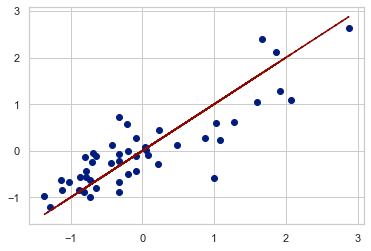

In [98]:
plt.scatter(y, y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

### keras方式实现

* 高阶API并不精简，这里使用tensorflow keras API来实现

In [99]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[X.shape[1]]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer='sgd', loss='mse')

In [101]:
class PrintEpochs(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 1000 == 0:
            print('epoch: {}, logs: {}'.format(epoch, logs))

In [102]:
model.fit(X, y, epochs=10000, verbose=0, callbacks=[PrintEpochs()])

2021-09-02 00:19:39.669632: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


epoch: 0, logs: {'loss': 0.6870020031929016}
epoch: 1000, logs: {'loss': 0.26153504848480225}
epoch: 2000, logs: {'loss': 0.26175591349601746}
epoch: 3000, logs: {'loss': 0.2618563175201416}
epoch: 4000, logs: {'loss': 0.26148030161857605}
epoch: 5000, logs: {'loss': 0.26158812642097473}
epoch: 6000, logs: {'loss': 0.26160359382629395}
epoch: 7000, logs: {'loss': 0.2616385519504547}
epoch: 8000, logs: {'loss': 0.26146188378334045}
epoch: 9000, logs: {'loss': 0.2615436911582947}


In [103]:
y_hat = model(X)

In [104]:
y_hat.shape

TensorShape([47, 1])

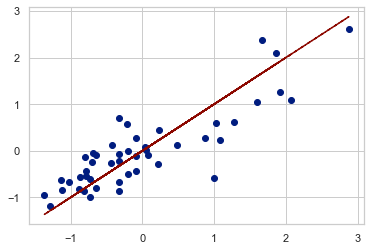

In [105]:
plt.scatter(tf.transpose(y), y_hat)
plt.plot(tf.squeeze(y), tf.squeeze(y), 'r--')

In [106]:
model.get_weights()

[array([[ 0.8758631 ],
        [-0.05261532]], dtype=float32),
 array([0.00111299], dtype=float32)]